In [1]:
import numpy as np
a=np.array([[1,2,3],
            [4,5,6],
            [7,8,9]])
a
a.shape
a[1][2]
#print (a.shape[1])
b=np.zeros(5)
b[1:]+=5
b

array([0., 5., 5., 5., 5.])

In [7]:
class Perceptron(object):
    """ Perceptron classifier.
    Parameters
    --------------
    eta:float
        Learning rate(between 0.0 and 1.0)
    n_iter:int
        Passes over the training dataset
    
    Attributes
    --------------
    w_:1d-array
        Weights after fitting.
    errors_:list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, x, y):
        """Fit training data.
        Parameters
        ------------
        x:{array-like},shape=[n_samples,n_features]
        Training vectors, where n_samples
        is the number of samples and
        n_features is the number of features
        
        y:array-like,shape=[n_samples]
        Target values.
        
        Returns
        ------------
        self:object
        """
        
        self.w_ = np.zeros(1+x.shape[1])
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x,y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self,x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [16]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


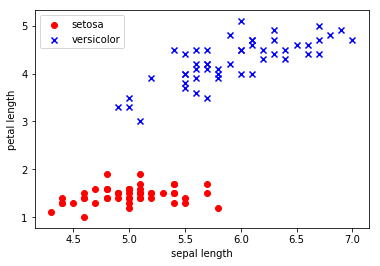

In [18]:
import matplotlib.pyplot as plt
import numpy as np
y =df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
x=df.iloc[0:100,[0,2]].values
plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='setosa')
plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()


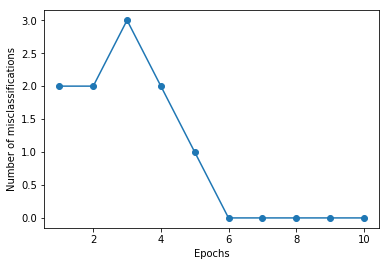

In [28]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x,y)
#print (y)
#print(x)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel("Epochs")
plt.ylabel('Number of misclassifications')
plt.show()

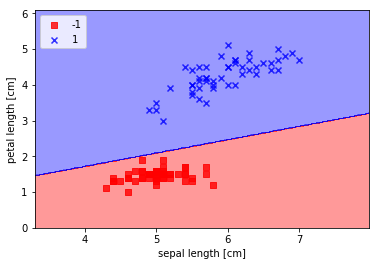

In [40]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    # setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min,x1_max=X[:,0].min()-1, X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl,1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
    

In [18]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target

from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)

In [19]:
from scipy.optimize import leastsq

In [21]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
 
def sigmoid_activation(x):
	# compute and return the sigmoid activation value for a
	# given input value
	return 1.0 / (1 + np.exp(-x))

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=float, default=100,
	help="# of epochs")
ap.add_argument("-a", "--alpha", type=float, default=0.01,
	help="learning rate")
args = vars(ap.parse_args())
# generate a 2-class classification problem with 250 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=250, n_features=2, centers=2,
	cluster_std=1.05, random_state=20)
 
# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]
 
# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))
 
# initialize a list to store the loss value for each epoch
lossHistory = []

usage: ipykernel_launcher.py [-h] [-e EPOCHS] [-a ALPHA]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\jmhao\AppData\Roaming\jupyter\runtime\kernel-4d7f3dd8-8a0a-4ced-a523-c6e9ceb63d5a.json


SystemExit: 2

C:\Users\jmhao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [22]:
name = input("Enter your name: ")

Enter your name: sd


In [2]:
# USAGE
# python gradient_descent.py

# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse

def sigmoid_activation(x):
	# compute and return the sigmoid activation value for a
	# given input value
	return 1.0 / (1 + np.exp(-x))

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=float, default=100,
	help="# of epochs")
ap.add_argument("-a", "--alpha", type=float, default=0.01,
	help="learning rate")
args = vars(ap.parse_args())

# generate a 2-class classification problem with 250 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=250, n_features=2, centers=2,
	cluster_std=1.05, random_state=20)

# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]

# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))

# initialize a list to store the loss value for each epoch
lossHistory = []

# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# take the dot product between our features `X` and the
	# weight matrix `W`, then pass this value through the
	# sigmoid activation function, thereby giving us our
	# predictions on the dataset
	preds = sigmoid_activation(X.dot(W))

	# now that we have our predictions, we need to determine
	# our `error`, which is the difference between our predictions
	# and the true values
	error = preds - y

	# given our `error`, we can compute the total loss value as
	# the sum of squared loss -- ideally, our loss should
	# decrease as we continue training
	loss = np.sum(error ** 2)
	lossHistory.append(loss)
	print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

	# the gradient update is therefore the dot product between
	# the transpose of `X` and our error, scaled by the total
	# number of data points in `X`
	gradient = X.T.dot(error) / X.shape[0]

	# in the update stage, all we need to do is nudge our weight
	# matrix in the opposite direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a
	# set of "more optimal" parameters
	W += -args["alpha"] * gradient

# to demonstrate how to use our weight matrix as a classifier,
# let's look over our a sample of training examples
for i in np.random.choice(250, 10):
	# compute the prediction by taking the dot product of the
	# current feature vector with the weight matrix W, then
	# passing it through the sigmoid activation function
	activation = sigmoid_activation(X[i].dot(W))

	# the sigmoid function is defined over the range y=[0, 1],
	# so we can use 0.5 as our threshold -- if `activation` is
	# below 0.5, it's class `0`; otherwise it's class `1`
	label = 0 if activation < 0.5 else 1

	# show our output classification
	print("activation={:.4f}; predicted_label={}, true_label={}".format(
		activation, label, y[i]))

# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()


usage: ipykernel_launcher.py [-h] [-e EPOCHS] [-a ALPHA]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\jmhao\AppData\Roaming\jupyter\runtime\kernel-8a9766a1-9e06-4d18-b6ea-9d9c99cd5802.json


SystemExit: 2

C:\Users\jmhao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
